Import dependencies

In [105]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Import Excel workbooks using pandas

This function reads in the data from the file passed as parameter and concatenates it with the dataFrame passed in.

In [106]:
    def read_file(dataFrame, input_file_path, race_code, year):
        try:
            temp_df = pd.read_excel (input_file_path, sheet_name = 'Type of Family', \
            names=['Characteristic','Value Type', 'All primary families', 'Married-couple families','Male householder, no spouse present', \
                'Female householder, no spouse present', 'Unrelated subfamilies'],\
            header=None,\
            skiprows=43,\
            index_col=None,\
            usecols="A,B,C:G")
            temp_df["Race"] = race_code
            temp_df["Year"] = year
            temp_df.fillna(method='ffill', inplace=True)
            frames = [dataFrame, temp_df]
            dataFrame = pd.concat(frames, ignore_index=True)
            temp_df["Characteristic"] = temp_df["Characteristic"].str.replace('\n','')
            temp_df["Value Type"]     = temp_df["Value Type"].str.replace('\n','')
        except:
            print("Error while trying to read in file ", input_file_path)
        finally:
            return(dataFrame)

In [107]:
try:
    del df
except NameError:
    pass

df = pd.DataFrame()
#----------------------------- 2019 ---------------------------------------------------------#
#2019 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ALL_RACES.xlsx'),  "AL", 2019)
#2019 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_WHITE_ONLY.xlsx'), "WO", 2019)
#2019 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_BLACK_ONLY.xlsx'), "BO", 2019)
#2019 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_ASIAN_ONLY.xlsx'), "AO", 2019)
#2019 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2019_finc_01_HISP_ONLY.xlsx'),  "HI", 2019)
#----------------------------- 2018 ---------------------------------------------------------#
#2018 - All races
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ALL_RACES.xlsx'),  "AL", 2018)
#2018 - White only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_WHITE_ONLY.xlsx'), "WO", 2018)
#2018 - Black only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_BLACK_ONLY.xlsx'), "BO", 2018)
#2018 - Asian only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_ASIAN_ONLY.xlsx'), "AO", 2018)
#2018 - Hispanic only
df = read_file(df, os.path.join('.', 'Resources', 'SourceData', '2018_finc_01_HISP_ONLY.xlsx'),  "HI", 2018)

In [108]:
df = df[['Characteristic', 'Value Type', 'Race', 'Year', 'All primary families', 'Married-couple families',\
     'Male householder, no spouse present', 'Female householder, no spouse present', 'Unrelated subfamilies']]

In [109]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize='x-small')

In [110]:
df

,Characteristic,Value Type,Race,Year,All primary families,Married-couple families,"Male householder, no spouse present","Female householder, no spouse present",Unrelated subfamilies
0,Median income,Value (Dol.),AL,2019,86011.0000,102032.0000,61705.0000,43359.0000,31468
1,Median income,Standard error (Dol.),AL,2019,540.0000,601.0000,779.0000,651.0000,2554
2,Mean income,Value (Dol.),AL,2019,116735.0000,134442.0000,79759.0000,58535.0000,44099
3,Mean income,Standard error (Dol.),AL,2019,835.0000,1040.0000,1660.0000,870.0000,3744
4,Gini ratio,Ratio,AL,2019,0.4540,0.4250,0.4280,0.4650,0.494
...,...,...,...,...,...,...,...,...,...
75,Mean income,Standard error (Dol.),HI,2018,920.0000,1299.0000,1684.0000,1518.0000,5208
76,Gini ratio,Ratio,HI,2018,0.4510,0.4240,0.3870,0.4950,0.53
77,Gini ratio,Standard error,HI,2018,0.0053,0.0062,0.0103,0.0127,0.0548
78,Income per\nfamily member,Value (Dol.),HI,2018,20094.0000,22661.0000,17884.0000,13748.0000,14190


In [111]:
line_plot_df = df[ (df['Characteristic'] == "Median income") & (df['Value Type'] == "Value (Dol.)") ]
line_plot_df = line_plot_df[["Year", "Race", "Married-couple families","Male householder, no spouse present", "Female householder, no spouse present"]]
line_plot_df["Unmarried"] = (line_plot_df["Male householder, no spouse present"] + df["Female householder, no spouse present"])/2
line_plot_df.drop(["Male householder, no spouse present","Female householder, no spouse present"], axis = 1, inplace=True)
line_plot_df.rename(columns={"Married-couple families": "Married"}, inplace=True)
line_plot_df

,Year,Race,Married,Unmarried
0,2019,AL,102032.0,52532.0
8,2019,WO,102489.0,54809.5
16,2019,BO,87951.0,44531.0
24,2019,AO,123516.0,72289.5
32,2019,HI,73166.0,47229.5
40,2018,AL,93329.0,47284.5
48,2018,WO,94056.0,49049.0
56,2018,BO,77824.0,39890.0
64,2018,AO,110407.0,64237.0
72,2018,HI,66327.0,41750.0


In [112]:
#df["Year"].unique()
#df[ df["Race"]=="AL"]["Married"]
line_plot_df.sort_values("Year",inplace=True)
line_plot_df

,Year,Race,Married,Unmarried
40,2018,AL,93329.0,47284.5
48,2018,WO,94056.0,49049.0
56,2018,BO,77824.0,39890.0
64,2018,AO,110407.0,64237.0
72,2018,HI,66327.0,41750.0
0,2019,AL,102032.0,52532.0
8,2019,WO,102489.0,54809.5
16,2019,BO,87951.0,44531.0
24,2019,AO,123516.0,72289.5
32,2019,HI,73166.0,47229.5


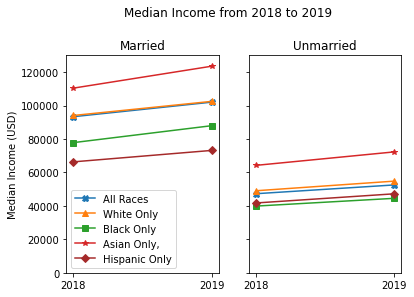

In [113]:
# Plot the median income as two-axis line charts, one for Unmarried, one for Married
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

#The x-labels
years = line_plot_df["Year"].unique().astype(str)

#------ Married -----------------
med_inc_all_married, =  ax1.plot(years,line_plot_df[line_plot_df["Race"]=="AL"]["Married"],\
     label="All Races", marker="X" )

med_inc_wo_married, = ax1.plot(years,line_plot_df[line_plot_df["Race"]=="WO"]["Married"],\
     label="White Only", marker="^" )

med_inc_bo_married, = ax1.plot(years,line_plot_df[line_plot_df["Race"]=="BO"]["Married"],\
     label="Black Only", marker="s" )


med_inc_ao_married, = ax1.plot(years,line_plot_df[line_plot_df["Race"]=="AO"]["Married"],\
     label="Asian Only,", marker="*" )

med_inc_hi_married, = ax1.plot(years,line_plot_df[line_plot_df["Race"]=="HI"]["Married"],color="brown",\
     label="Hispanic Only", marker="D" )

#------ Single --------------------
med_inc_all_unmarried, = ax2.plot(years,line_plot_df[line_plot_df["Race"]=="AL"]["Unmarried"],\
     label="All Races",  marker="X" )

med_inc_wo_unmarried, = ax2.plot(years,line_plot_df[line_plot_df["Race"]=="WO"]["Unmarried"],\
     label="White Only", marker="^" )

med_inc_bo_unmarried, = ax2.plot(years,line_plot_df[line_plot_df["Race"]=="BO"]["Unmarried"],\
     label="Black Only", marker="s" )


med_inc_ao_unmarried, = ax2.plot(years,line_plot_df[line_plot_df["Race"]=="AO"]["Unmarried"],\
     label="Asian Only", marker="*" )

med_inc_hi_unmarried, = ax2.plot(years,line_plot_df[line_plot_df["Race"]=="HI"]["Unmarried"],color="brown",\
     label="Hispanic Only", marker="D" )

# Create a legend
ax1.legend(handles=[med_inc_all_married, med_inc_wo_married, med_inc_bo_married, med_inc_ao_married,\
    med_inc_hi_married], loc="best")

# Y-Limits
ax1.set_ylim([0,130000])
ax2.set_ylim([0,130000])

#Labels and titles
ax1.set_title('Married')
ax1.set_ylabel('Median Income (USD)')
ax2.set_title('Unmarried')
fig.suptitle(y=1.05, t='Median Income from 2018 to 2019')


# Show the chart
plt.show()

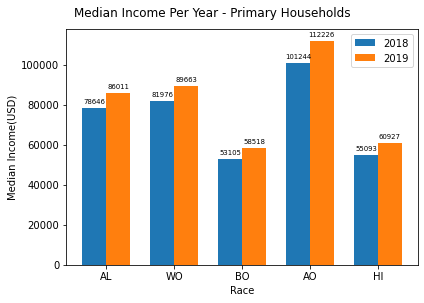

In [114]:
fig, ax = plt.subplots() 
fig.suptitle('Median Income Per Year - Primary Households', y=1.04)


temp_df = df[ (df["Characteristic"] == "Median income") & (df["Value Type"] == "Value (Dol.)")]
temp_df = temp_df[["Year","Race","All primary families"] ]

labels = temp_df["Race"].unique()

x = np.arange(len(labels))  # the label locations

x_values = temp_df[ temp_df["Year"] == 2018]["Race"]


med_inc_for_2018  = temp_df[ temp_df["Year"] == 2018]["All primary families"].astype(int)
med_inc_for_2019  = temp_df[ temp_df["Year"] == 2019]["All primary families"].astype(int)

width=0.35

ax.set_ylabel("Median Income(USD)")
ax.set_xlabel("Race")
ax.set_xticks(x)
ax.set_xticklabels(x_values)
rects1 = ax.bar(x - width/2, med_inc_for_2018, width = 0.35, label="2018")
rects2 = ax.bar(x + width/2, med_inc_for_2019, width = 0.35, label="2019")
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.show()

In [115]:
#group1 =  temp_df[temp_df["Race"] == "AL"]["All primary families"].astype(int)
group2 =  temp_df[temp_df["Race"] == "WO"]["All primary families"].astype(int)
group3 =  temp_df[temp_df["Race"] == "BO"]["All primary families"].astype(int)
group4 =  temp_df[temp_df["Race"] == "AO"]["All primary families"].astype(int)
group5 =  temp_df[temp_df["Race"] == "HI"]["All primary families"].astype(int)
# Perform the ANOVA
stats.f_oneway(group2, group3, group4, group5)

F_onewayResult(statistic=38.86190286956864, pvalue=0.00204018788123079)

In [123]:
line_plot_df
population1 = line_plot_df["Unmarried"]
population2 = line_plot_df["Married"]
print(population1.mean(), population2.mean())
stats.ttest_ind(population1, population2, equal_var=False)


51360.2 93109.7


Ttest_indResult(statistic=-6.51639455188601, pvalue=1.1819101025319915e-05)